## Sockpuppet Dataset Graphs

#### Histograms: year, activity count, length of combined comments (user, topic) -- of all contributions and comments only

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## All contributions

In [29]:
sock_contributions = pd.read_json('socks_with_contribs_MODIFIED_FORMAT.json')
control_contributions = pd.read_json('control_with_contribs_MODIFIED_FORMAT.json')

In [30]:
sock_contributions.head(100)

,pageid,revid,parentid,title,timestamp,sizediff,comments,author
0,9740947,359394875,359383077,Talk:Criticism of fractional-reserve banking,2010-05-01 06:12:40+00:00,158,,$atan's$pawn
1,9740947,359383077,359382991,Talk:Criticism of fractional-reserve banking,2010-05-01 04:06:06+00:00,20,,$atan's$pawn
2,9740947,359382991,358959286,Talk:Criticism of fractional-reserve banking,2010-05-01 04:05:08+00:00,681,,$atan's$pawn
3,9740947,358959286,358959183,Talk:Criticism of fractional-reserve banking,2010-04-29 00:50:06+00:00,-16,,$atan's$pawn
4,9740947,358959183,358958898,Talk:Criticism of fractional-reserve banking,2010-04-29 00:49:30+00:00,16,,$atan's$pawn
...,...,...,...,...,...,...,...,...
95,65348,353151554,353151524,Talk:Michael Jackson,2010-03-31 13:52:39+00:00,-18,,2012thefilm
96,65348,353151453,353090859,Talk:Michael Jackson,2010-03-31 13:52:00+00:00,430,"== Record sales == Do your research, if that's...",2012thefilm
97,23915051,327791222,308056004,Talk:Good Luck Charlie,2009-11-25 02:49:39+00:00,580,== Episode Title == I found this Episode Title...,1989 Rosie
98,5633470,327788214,327787615,Talk:List of The Closer episodes,2009-11-25 02:28:31+00:00,1935,"== Series overview == {| class=""wikitable"" |- ...",1989 Rosie


In [31]:
control_contributions.head(100)

,pageid,revid,parentid,title,timestamp,sizediff,comments,author
0,2631381,291402086,290735165,Talk:Nurse practitioner,2009-05-21 14:11:23+00:00,-1,,Fuzbaby
1,583298,52176009,51782161,Talk:Urban exploration,2006-05-08 18:09:54+00:00,47,I would enjoy reading other opinions about the...,Seicer
2,520594,987847887,949848920,Talk:Bionicle,2020-11-09 16:23:38+00:00,536,"== ""Bionicle in Japan"" listed at [[Wikipedia:R...",Dominicmgm
3,10724261,390104251,360990723,Talk:Antony Fisher,2010-10-11 18:00:01+00:00,377,==Early years== I have removed the quotes from...,Larrytheordinarydragon
4,2581313,22231113,0,Talk:Kenji Tomiki,2005-08-31 06:06:29+00:00,171,I've been a student at Kenji Tomiki's dojo in ...,PRehse
...,...,...,...,...,...,...,...,...
95,11042674,128207690,128040688,Talk:James Paul Lewis Jr.,2007-05-04 14:00:34+00:00,169,"I think it should be kept, but marked for clea...",Keilana
96,143004,400508,400478,Talk:Law (principle),2002-11-02 22:08:06+00:00,333,<nowiki>[[Adage]]</nowiki> could be an article...,Fred Bauder
97,303093,363351383,362800509,Talk:Evangelical Lutheran Church in America,2010-05-21 07:44:55+00:00,346,"==NALC== I am new to Wikipedia, but I have add...",Confession0791
98,1455093,75961048,30201594,Talk:Edward the Exile,2006-09-15 23:54:37+00:00,1125,It is a bit incongruous to exclude this partic...,Agricolae


### Contributions content overview

In [78]:
def plotPieChart(df, filename):
    adding = 0
    deleting = 0
    moving = 0
    not_available = 0
    total = 0

    for c in df.iterrows():
        total += 1
        if c[1]["sizediff"] < 0:
            deleting += 1
        elif c[1]["sizediff"] > 0 and c[1]["comments"] == "":
            not_available += 1
        elif c[1]["sizediff"] == 0 and c[1]["comments"] == "":
            moving += 1
        else:
            adding += 1

    print("Adding/editing: " + str(adding + not_available))
    print("Deleting: " + str(deleting))
    print("Moving: " + str(moving))
    # print("Not available: " + str(not_available))
    print(total)
    
    data = [adding, deleting, moving]
    labels = ["Adding/editing comments", "Deleting comments", "Moving pages"]
    
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]

    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.savefig(filename)


    

Adding/editing: 32877
Deleting: 3990
Moving: 3223
40090


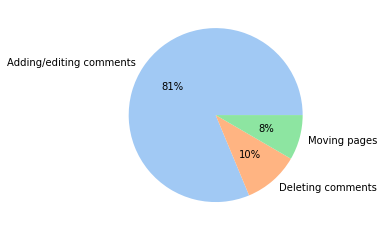

In [79]:
plotPieChart(sock_contributions, "socks_pie_chart.pdf")

Adding/editing: 89625
Deleting: 11364
Moving: 5807
106796


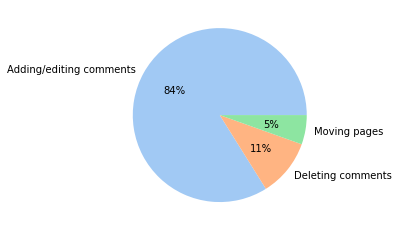

In [80]:
plotPieChart(control_contributions, "control_pie_chart.pdf")

### Year distribution

In [32]:
lbl = []
start = 2003
while start != 2023:
    lbl.append(str(start))
    start += 1

(12045, 19345)

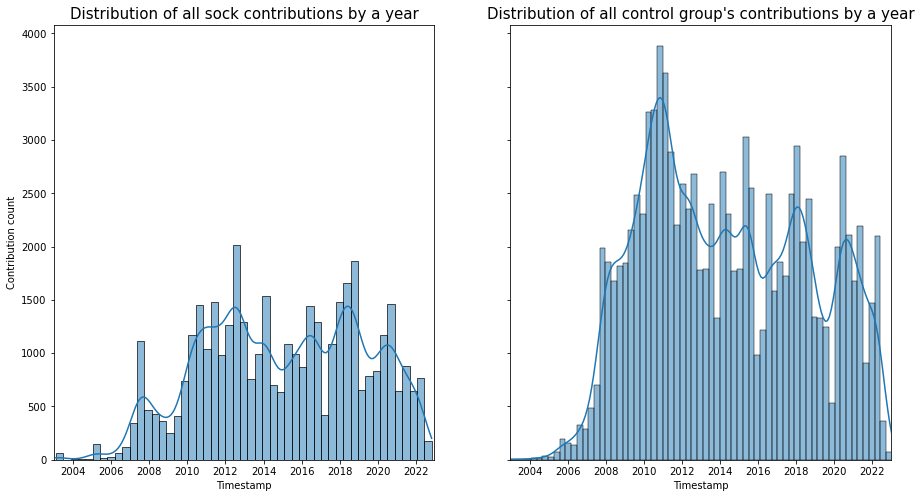

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(15,8))
sns.histplot(ax=ax1, data=sock_contributions, x="timestamp", kde = True)
ax1.set_title("Distribution of all sock contributions by a year", size = 15)
ax1.set(xlabel='Timestamp', ylabel = "Contribution count")
ax1.set_xlim((2003-1970)*365, (2023-1970)*365)

sns.histplot(ax=ax2, data=control_contributions, x="timestamp", kde = True)
ax2.set_title("Distribution of all control group's contributions by a year", size = 15)
ax2.set(xlabel='Timestamp', ylabel = "Contribution count")
ax2.set_xlim((2003-1970)*365, (2023-1970)*365)

In [34]:
# fig, ax = plt.subplots()
# sns.histplot(data=sock_contributions, x="timestamp", ax = ax)
 
# # change the limits of X-axis
# ax.set_xlim((2003-1970)*365, (2023-1970)*365)
# plt.show()

### Number of contributions

In [35]:
sock_contributions.groupby('author')['comments'].count()

author
$atan's$pawn                6
100 uses for a dead cat     1
11tsFound                   1
120 Volt monkey            15
1223Sallybride              6
                           ..
Zoomtoarttown               1
Zootychoon                  3
ZunayedBabunagari           1
Zuwed1                      2
Örtstedt                    8
Name: comments, Length: 2483, dtype: int64

[Text(0.5, 0, 'Number of contributions'), Text(0, 0.5, 'User count')]

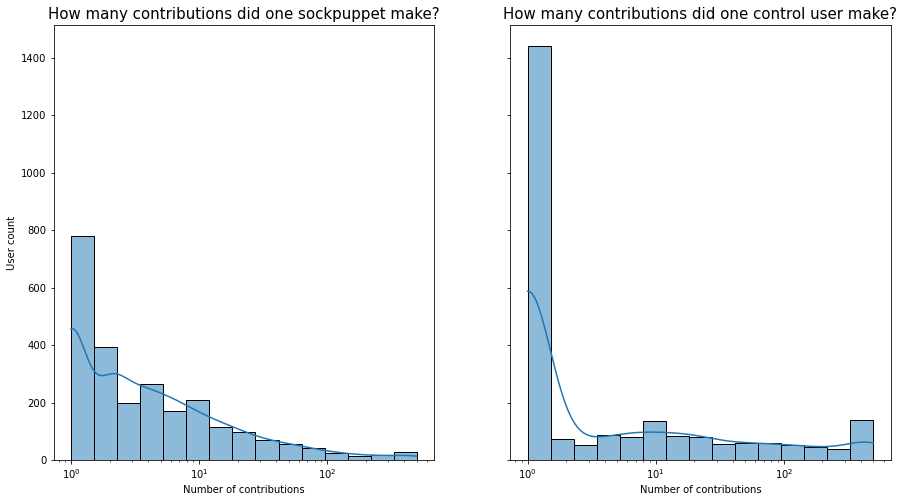

<Figure size 1080x576 with 0 Axes>

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(15,8))
sns.histplot(ax=ax1, data=sock_contributions.groupby('author')['comments'].count(), kde = True, log_scale = True, bins = 15)
ax1.set_title("How many contributions did one sockpuppet make?", size = 15)
ax1.set(xlabel='Number of contributions', ylabel = "User count")

plt.figure(figsize=(15,8))
sns.histplot(ax=ax2, data=control_contributions.groupby('author')['comments'].count(), kde = True, log_scale = True, bins = 15)
ax2.set_title("How many contributions did one control user make?", size = 15)
ax2.set(xlabel='Number of contributions', ylabel = "User count")

In [37]:
sock_contributions.groupby('author')['comments'].count().describe()

count    2483.000000
mean       16.145791
std        52.804358
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       500.000000
Name: comments, dtype: float64

In [38]:
control_contributions.groupby('author')['comments'].count().describe()

count    2483.000000
mean       43.010874
std       114.491875
min         1.000000
25%         1.000000
50%         1.000000
75%        12.000000
max       500.000000
Name: comments, dtype: float64

## Comments only

In [39]:
sock_comments = sock_contributions[sock_contributions["comments"] != ""]

In [40]:
control_comments = control_contributions[control_contributions["comments"] != ""]

### Year distribution

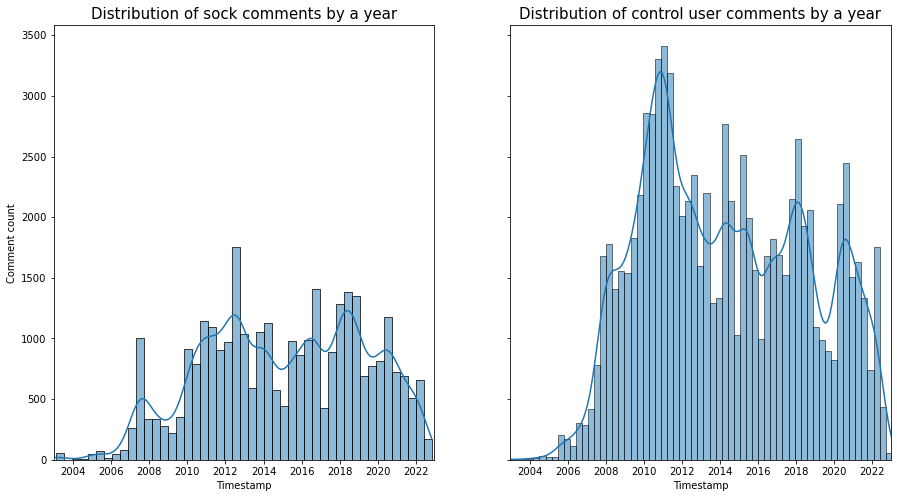

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(15,8))
sns.histplot(ax=ax1, data=sock_comments, x="timestamp", kde = True)
ax1.set_title("Distribution of sock comments by a year", size = 15)
ax1.set_xlim((2003-1970)*365, (2023-1970)*365)
ax1.set(xlabel='Timestamp', ylabel = "Comment count")

sns.histplot(ax=ax2, data=control_comments, x="timestamp", kde = True)
ax2.set_title("Distribution of control user comments by a year", size = 15)
ax2.set_xlim((2003-1970)*365, (2023-1970)*365)
ax2.set(xlabel='Timestamp', ylabel = "Comment count")


plt.savefig('comments_year_distrib.png')

In [42]:
sock_comments['timestamp'].describe()

/tmp/ipykernel_70/3207347307.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sock_comments['timestamp'].describe()


count                         31317
unique                        31313
top       2017-12-07 21:37:13+00:00
freq                              2
first     2003-02-03 00:03:17+00:00
last      2022-10-31 14:03:15+00:00
Name: timestamp, dtype: object

In [43]:
control_comments['timestamp'].describe()

/tmp/ipykernel_70/2430933338.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  control_comments['timestamp'].describe()


count                         89463
unique                        89379
top       2015-08-20 10:16:46+00:00
freq                              6
first     2001-12-16 17:21:01+00:00
last      2023-01-08 14:38:43+00:00
Name: timestamp, dtype: object

### Number of comments

In [44]:
sock_comments.groupby('author')['comments'].count()

author
100 uses for a dead cat     1
11tsFound                   1
120 Volt monkey            12
1223Sallybride              4
1424a                       1
                           ..
Zoomtoarttown               1
Zootychoon                  2
ZunayedBabunagari           1
Zuwed1                      2
Örtstedt                    8
Name: comments, Length: 2277, dtype: int64

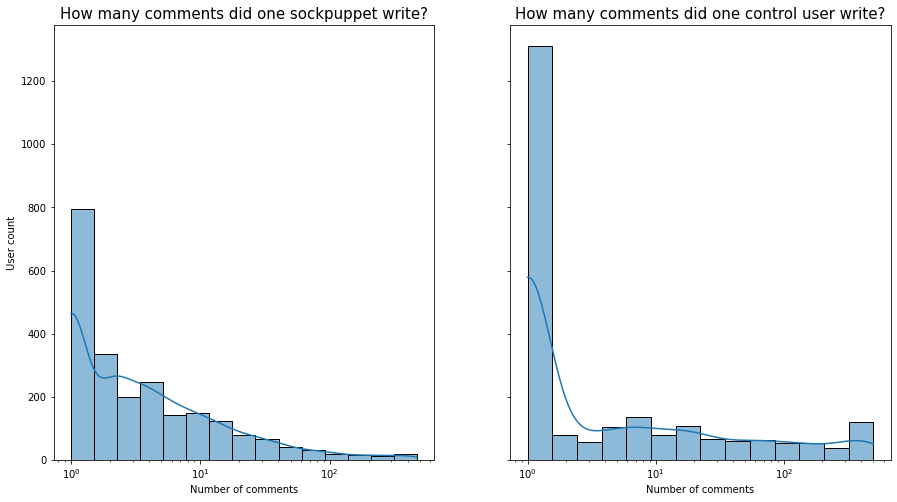

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(15,8))
sns.histplot(ax=ax1, data=sock_comments.groupby('author')['comments'].count(), kde = True, log_scale = True, bins = 15)
ax1.set_title("How many comments did one sockpuppet write?", size = 15)
ax1.set(xlabel='Number of comments', ylabel = "User count")

sns.histplot(ax=ax2, data=control_comments.groupby('author')['comments'].count(), kde = True, log_scale = True, bins = 14)
ax2.set_title("How many comments did one control user write?", size = 15)
ax2.set(xlabel='Number of comments', ylabel = "User count")

plt.savefig('comments_count_per_sock.png')

In [46]:
sock_comments.groupby('author')['comments'].count().describe()

count    2277.000000
mean       13.753623
std        45.050669
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       472.000000
Name: comments, dtype: float64

In [47]:
control_comments.groupby('author')['comments'].count().describe()

count    2330.000000
mean       38.396137
std       100.351926
min         1.000000
25%         1.000000
50%         1.000000
75%        13.000000
max       500.000000
Name: comments, dtype: float64

### Length of comments aggregated for (user, topic) pair

In [48]:
aggregated_sock_comments = sock_comments.copy()
aggregated_sock_comments["comments"] = aggregated_sock_comments.groupby(['title', 'author'])['comments'].transform(lambda x: ' '.join(x))
aggregated_sock_comments_plot = aggregated_sock_comments[['author', 'title', 'comments']].drop_duplicates()

In [49]:
lengths_socks = aggregated_sock_comments_plot['comments'].apply(len)
lengths_socks

6          46
7         329
8         115
9        1226
15         96
         ... 
40075     606
40077     174
40078     152
40079     357
40082    8246
Name: comments, Length: 12405, dtype: int64

In [50]:
aggregated_control_comments = control_comments.copy()
aggregated_control_comments["comments"] = aggregated_control_comments.groupby(['title', 'author'])['comments'].transform(lambda x: ' '.join(x))
aggregated_control_comments_plot = aggregated_control_comments[['author', 'title', 'comments']].drop_duplicates()

In [51]:
lengths_control = aggregated_control_comments_plot['comments'].apply(len)
lengths_control

1         428
2         457
3         260
4         172
5         478
         ... 
106786    185
106791    197
106792    232
106793     89
106795    213
Name: comments, Length: 47334, dtype: int64

[Text(0.5, 0, "Aggregated comment's length"), Text(0, 0.5, 'Comment count')]

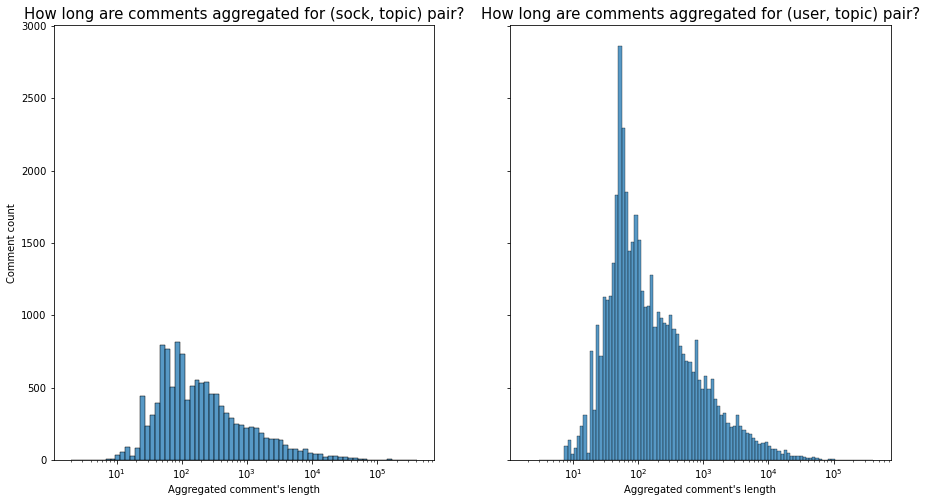

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize=(15,8))
sns.histplot(ax=ax1, data=lengths_socks, log_scale = True)
ax1.set_title("How long are comments aggregated for (sock, topic) pair?", size = 15)
ax1.set(xlabel='Aggregated comment\'s length', ylabel = "Comment count")

sns.histplot(ax=ax2, data=lengths_control, log_scale = True)
ax2.set_title("How long are comments aggregated for (user, topic) pair?", size = 15)
ax2.set(xlabel='Aggregated comment\'s length', ylabel = "Comment count")

In [53]:
lengths_socks.describe()

count     12405.000000
mean       1302.142201
std        8048.782347
min           2.000000
25%          63.000000
50%         155.000000
75%         489.000000
max      407944.000000
Name: comments, dtype: float64

In [54]:
lengths_control.describe()

count     47334.000000
mean        844.425487
std        4554.730100
min           3.000000
25%          53.000000
50%         110.000000
75%         406.000000
max      397454.000000
Name: comments, dtype: float64